In [170]:
import os
import sys
import torch

In [171]:
layer = 4
head = 18

part = layer // 8
layer = layer % 8

In [184]:
seq = 4
fname = '/att_tmp/att%d_%d.th' % (seq, part)

prompt_len = torch.load('/att_tmp/prompt_len.th', weights_only=False)
att = torch.load(fname, weights_only=False)

all_data = {}
a_matrix = att[layer, head]

#data = [torch.sum(torch.diag(a_matrix)[:prompt_len]).item(), torch.sum(torch.diag(a_matrix)[prompt_len:]).item()]
#data.extend([calc_mtd(a_matrix, prompt_len, kind = 0), calc_mtd(a_matrix, prompt_len, kind = 1)])

print(seq, part, 'finished')

4 0 finished


In [185]:
part, layer

(0, 4)

In [186]:
import seaborn as sns
from matplotlib.colors import LogNorm, PowerNorm

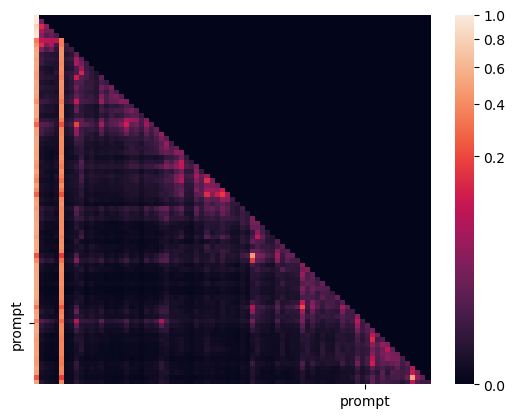

In [187]:
N = a_matrix.shape[0]

ax = sns.heatmap(a_matrix, norm = PowerNorm(gamma=0.3))
_ = ax.set_xticks([prompt_len], labels = (['prompt']), rotation = 0)
_ = ax.set_yticks([prompt_len], labels = (['prompt']), rotation = 90)